<a href="https://colab.research.google.com/github/faizankshaikh/Tech-Test-ML-Hand/blob/main/HandSegmentationUsingYOLO_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install required libraries

!pip install ultralytics
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 10.5 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-wghupjax
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-wghupjax
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36586 sha256=0b25bbbd1d06fe6c15d56db090508cba5f69099e90e599b9d4c763843aff361a
  Stored in directory: /tmp/pip-ephem-wheel-cache-emb3pwnm/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [2]:
#@title Download dataset
!gdown 1Mc72BLGnZZQ0mhnh9rHOdJzYmITN-PPL
!unzip public_hand_dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1Mc72BLGnZZQ0mhnh9rHOdJzYmITN-PPL
To: /content/public_hand_dataset.zip
100% 737M/737M [00:07<00:00, 100MB/s] 
Archive:  public_hand_dataset.zip
   creating: public_hand_dataset/
   creating: public_hand_dataset/5678812149462625182938872268415369219/
   creating: public_hand_dataset/5678812149462625182938872268415369219/no_bg/
  inflating: public_hand_dataset/5678812149462625182938872268415369219/no_bg/hand.jpeg  
   creating: public_hand_dataset/5678812149462625182938872268415369219/original/
  inflating: public_hand_dataset/5678812149462625182938872268415369219/original/hand.jpeg  
   creating: public_hand_dataset/6505892033483893725942926596451532802/
   creating: public_hand_dataset/6505892033483893725942926596451532802/no_bg/
  inflating: public_hand_dataset/6505892033483893725942926596451532802/no_bg/hand.jpeg  
   creating: public_hand_dataset/6505892033483893725942926596451532802/original/
  inflating: public_hand_dataset/65058

In [5]:
#@title Import libraries and modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
from random import choice
from ultralytics import YOLO
from segment_anything import sam_model_registry, SamPredictor
from IPython.display import display, Image

In [4]:
#@title Download and setup pretrained models
model = YOLO('/content/yolov8n.pt')

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

100%|██████████| 6.23M/6.23M [00:00<00:00, 48.8MB/s]


--2023-09-26 21:53:40--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.162.163.19, 3.162.163.11, 3.162.163.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.162.163.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  65.4MB/s    in 19s     

2023-09-26 21:53:59 (130 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]




image 1/1 /content/public_hand_dataset/162773953452783016922694876129889550338/original/hand.jpeg: 640x352 1 person, 1 mouse, 1 book, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 352)


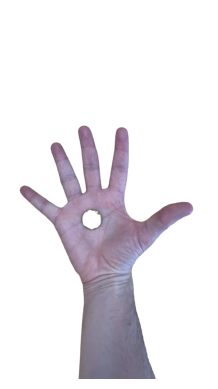

In [16]:
#@title Segment hand from a random image

image_path = choice(glob("public_hand_dataset/*/original/*.jpeg"))
image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

results = model.predict(source=image_path, conf=0.2)
bbox=np.array(results[0].boxes.xyxy.tolist()[0])[None, :]

predictor.set_image(image)

masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=bbox,
    multimask_output=False,
)

segmentation_mask = masks[0]
binary_mask = np.where(segmentation_mask > 0.5, 1, 0)

new_image = (np.ones_like(image) * 255 * (1 - binary_mask[..., np.newaxis])) + (image * binary_mask[..., np.newaxis])

plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()